In [1]:
# Import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
df = pd.read_csv('market_vendors.csv')

In [3]:
df.head() #Eyeball

,vendorID,theme,homeState,carnivals,complaints,est_energy,est_hourly_vol,LL_passholder,est_hourly_gross
0,1,Artisan Chocolates,Maine,3,9,57.291961,118,0,217.93
1,2,Local Artists,Vermont,1,2,39.404898,105,1,209.51
2,3,Fortune Teller,New Hampshire,5,4,47.175958,94,0,200.68
3,4,Fried Dough and Pizza,Maine,8,0,58.192568,118,0,251.40
4,5,craft beer,New Hampshire,7,6,56.657908,102,0,168.76


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   vendorID          700 non-null    int64  
 1   theme             700 non-null    object 
 2   homeState         700 non-null    object 
 3   carnivals         700 non-null    int64  
 4   complaints        700 non-null    int64  
 5   est_energy        700 non-null    float64
 6   est_hourly_vol    700 non-null    int64  
 7   LL_passholder     700 non-null    int64  
 8   est_hourly_gross  700 non-null    float64
dtypes: float64(2), int64(5), object(2)
memory usage: 49.3+ KB


In [5]:
df.shape

(700, 9)

In [6]:
df['theme'].tail(10)

690    Video Game/eSports
691            craft beer
692                     8
693                     3
694                     4
695                     7
696                     5
697                     5
698                     7
699                     9
Name: theme, dtype: object

There are miss type for 'theme', so drop the row data for index[692:699]

In [7]:
# Drop the row data with index[692:699] for EDA
df.drop([692,693,694,695,696,697,698,699], inplace = True)

In [8]:
# Check 
df['theme'].tail()

687       Games Of Chance
688        Homemade Gifts
689        Homemade Gifts
690    Video Game/eSports
691            craft beer
Name: theme, dtype: object

In [9]:
df['theme'].nunique()

14

There are total in 14 themes in vendors

In [10]:
# Check all the dataset with NaN values
# As long as there is a null value, return TRUE, otherwise return FALSE
np.any(df.isnull())

False

In [11]:
# Save the final dataframe to "market_vendors_clean"
df.to_csv('market_vendors_clean.csv')

In [12]:
df_vendor = pd.read_csv('market_vendors_clean.csv')
df_vendor.head()

,Unnamed: 0,vendorID,theme,homeState,carnivals,complaints,est_energy,est_hourly_vol,LL_passholder,est_hourly_gross
0,0,1,Artisan Chocolates,Maine,3,9,57.291961,118,0,217.93
1,1,2,Local Artists,Vermont,1,2,39.404898,105,1,209.51
2,2,3,Fortune Teller,New Hampshire,5,4,47.175958,94,0,200.68
3,3,4,Fried Dough and Pizza,Maine,8,0,58.192568,118,0,251.40
4,4,5,craft beer,New Hampshire,7,6,56.657908,102,0,168.76


In [13]:
df_vendor.columns

Index(['Unnamed: 0', 'vendorID', 'theme', 'homeState', 'carnivals',
       'complaints', 'est_energy', 'est_hourly_vol', 'LL_passholder',
       'est_hourly_gross'],
      dtype='object')

In [14]:
df_vendor.drop('Unnamed: 0', axis = 1, inplace = True)

In [15]:
# Check for outliers
df_vendor.describe()

,vendorID,carnivals,complaints,est_energy,est_hourly_vol,LL_passholder,est_hourly_gross
count,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000
mean,349.291908,5.114162,5.228324,47.975867,111.361272,0.195087,218.970159
std,202.053170,2.188637,4.936342,13.544075,11.305755,0.396554,35.089505
min,1.000000,0.000000,0.000000,3.069903,82.000000,0.000000,81.290000
25%,173.750000,4.000000,0.000000,39.920280,104.000000,0.000000,194.295000
50%,350.500000,5.000000,4.000000,48.075756,111.000000,0.000000,217.735000
75%,523.250000,7.000000,9.000000,57.372752,119.000000,0.000000,242.735000
max,700.000000,13.000000,20.000000,91.567936,147.000000,1.000000,322.570000


From the result, it is easily to find out there are outliers in carnivals.

/Users/hardikgupta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


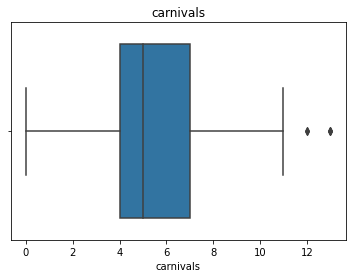

None


In [16]:
# The boxplot(IQR) for 'carnivals'
sns.boxplot(df_vendor['carnivals'])
plt.title('carnivals')
print(plt.show())

/Users/hardikgupta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


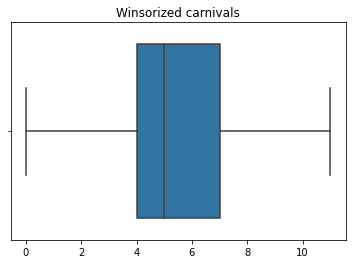

None


In [17]:
Winsorized_car = winsorize(df_vendor['carnivals'], (0.00,0.01))

sns.boxplot(Winsorized_car)
plt.title('Winsorized carnivals')
print(plt.show())

In [18]:
df_vendor['carnivals'] = Winsorized_car

In [19]:
# The final clean dataframe(df_vendor)
df_vendor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   vendorID          692 non-null    int64  
 1   theme             692 non-null    object 
 2   homeState         692 non-null    object 
 3   carnivals         692 non-null    int64  
 4   complaints        692 non-null    int64  
 5   est_energy        692 non-null    float64
 6   est_hourly_vol    692 non-null    int64  
 7   LL_passholder     692 non-null    int64  
 8   est_hourly_gross  692 non-null    float64
dtypes: float64(2), int64(5), object(2)
memory usage: 48.8+ KB


In [20]:
# summary statistics 1: 
df_vendor.describe()


,vendorID,carnivals,complaints,est_energy,est_hourly_vol,LL_passholder,est_hourly_gross
count,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000
mean,349.291908,5.102601,5.228324,47.975867,111.361272,0.195087,218.970159
std,202.053170,2.152545,4.936342,13.544075,11.305755,0.396554,35.089505
min,1.000000,0.000000,0.000000,3.069903,82.000000,0.000000,81.290000
25%,173.750000,4.000000,0.000000,39.920280,104.000000,0.000000,194.295000
50%,350.500000,5.000000,4.000000,48.075756,111.000000,0.000000,217.735000
75%,523.250000,7.000000,9.000000,57.372752,119.000000,0.000000,242.735000
max,700.000000,11.000000,20.000000,91.567936,147.000000,1.000000,322.570000


In [21]:
# summary statistics 2:
df_vendor.nunique()

vendorID            692
theme                14
homeState             7
carnivals            12
complaints           21
est_energy          688
est_hourly_vol       61
LL_passholder         2
est_hourly_gross    665
dtype: int64

In [22]:
# summary statistics 3:
g = df_vendor.groupby('homeState')
g

In [23]:
g.mean()

,vendorID,carnivals,complaints,est_energy,est_hourly_vol,LL_passholder,est_hourly_gross
homeState,,,,,,,
Connecticut,385.750000,4.937500,5.562500,49.491742,113.125000,0.208333,222.371250
Maine,344.139089,5.083933,4.940048,47.495915,110.956835,0.182254,219.283405
Massachusetts,439.111111,5.259259,7.296296,44.172066,115.481481,0.259259,224.830000
New Hampshire,326.542857,5.228571,4.485714,47.629391,112.228571,0.285714,218.738857
Ontario,379.250000,5.000000,6.187500,48.428355,115.187500,0.062500,223.366875
Quebec,331.685185,5.314815,5.962963,48.727077,110.351852,0.203704,212.406296
Vermont,349.916667,4.983333,5.983333,51.418017,109.783333,0.166667,216.440167


In [24]:
# summary statistics 4:
g1 = df_vendor.groupby('theme')
g1

In [25]:
g1.mean()

,vendorID,carnivals,complaints,est_energy,est_hourly_vol,LL_passholder,est_hourly_gross
theme,,,,,,,
Artisan Chocolates,384.106195,5.035398,5.265487,52.164656,111.831858,0.194690,214.720354
Canadian Snacks,340.324324,5.648649,4.972973,50.085684,111.729730,0.229730,221.436892
Design Your Own T-Shirt,384.368421,9.105263,4.631579,56.415234,114.842105,0.263158,222.981053
Fortune Teller,239.000000,5.444444,7.444444,45.398320,112.444444,0.111111,207.072222
Fried Dough and Pizza,293.320000,4.986667,4.800000,50.318975,110.666667,0.133333,219.167333
Games Of Chance,321.611765,4.858824,4.317647,50.341382,111.952941,0.235294,222.085176
Homemade Gifts,340.307692,5.326923,6.269231,37.462214,111.423077,0.221154,215.885385
Ice Cold Lemonade,334.785714,3.428571,5.547619,50.196666,110.071429,0.166667,218.952381
Local Artists,353.945946,4.905405,5.270270,38.371918,112.216216,0.189189,224.376216


The vendors are from 7 separate states and they hold 14 distinct theme activities. The most popular vendor is currently expected to attract an average of 147 tourists per hour, and the least popular vendor can also attract about 82 tourists per hour. The average hourly revenue that the vendor will generate is roughly $217. Vendors from Massachusetts is expected to be the most popular most profitable. If look at the profitability of different themes, the local artists-themed activities are the most profitable activities. Fortune teller is the least profitable themed campaign, and conversely, this campaign has the highest number of complaints based on the records of previous activities. 

# Segmentation and Targeting 

In [75]:
boston = pd.read_csv("greater_boston.csv")

In [76]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   householdID              15000 non-null  int64  
 1   total_ppl                14925 non-null  float64
 2   own_rent                 15000 non-null  object 
 3   square_foot              15000 non-null  int64  
 4   household_income         15000 non-null  float64
 5   number_pets              15000 non-null  int64  
 6   region                   15000 non-null  object 
 7   entertainment_spend_est  15000 non-null  float64
 8   travel_spend_est         15000 non-null  float64
 9   under_12                 14925 non-null  float64
 10  LL_passholder            15000 non-null  object 
dtypes: float64(5), int64(3), object(3)
memory usage: 1.3+ MB


In [77]:
boston.head(10)

,householdID,total_ppl,own_rent,square_foot,household_income,number_pets,region,entertainment_spend_est,travel_spend_est,under_12,LL_passholder
0,1,1.0,own,3309,82050.03,1,South Shore,3189.11,3083.41,1.0,Yes
1,2,1.0,own,3814,83077.81,2,MetroWest,4175.35,4713.28,1.0,Yes
2,3,2.0,rent,2592,91401.41,2,North Shore,1814.98,3479.07,2.0,No
3,4,1.0,own,2628,73048.55,1,Middlesex,1945.14,3842.42,1.0,No
4,5,1.0,rent,2442,89145.36,2,Suffolk,4410.86,1913.28,1.0,Yes
5,6,1.0,own,1178,92344.81,2,Suffolk,3367.13,4921.84,1.0,No
6,7,1.0,own,3022,94399.56,1,Middlesex,3856.93,5157.12,1.0,No
7,8,2.0,own,2421,83902.08,1,South Shore,4451.73,4508.93,2.0,No
8,9,1.0,own,2657,112051.67,1,Suffolk,3015.27,4299.74,1.0,No
9,10,2.0,own,4298,101445.28,4,Suffolk,4478.24,3997.68,2.0,No


In [78]:
boston.isnull().sum()

householdID                 0
total_ppl                  75
own_rent                    0
square_foot                 0
household_income            0
number_pets                 0
region                      0
entertainment_spend_est     0
travel_spend_est            0
under_12                   75
LL_passholder               0
dtype: int64

In [79]:
boston.describe()

,householdID,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est,under_12
count,15000.000000,14925.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,14925.000000
mean,7500.500000,1.580570,3118.928600,84659.802060,1.509200,3451.736870,3943.419994,1.580570
std,4330.271354,0.815143,815.925967,25756.481173,0.790163,1229.005744,744.658639,0.815143
min,1.000000,0.000000,370.000000,-3078.560000,0.000000,-283.350000,1037.610000,0.000000
25%,3750.750000,1.000000,2506.000000,66787.702500,1.000000,2593.902500,3455.965000,1.000000
50%,7500.500000,2.000000,3042.000000,84303.245000,2.000000,3390.650000,3959.620000,2.000000
75%,11250.250000,2.000000,3738.000000,102643.917500,2.000000,4279.240000,4441.960000,2.000000
max,15000.000000,4.000000,6081.000000,171989.560000,4.000000,7942.620000,7014.070000,4.000000


In [ ]:
##### we are assuming that the variable household_income in negitive because the people who has 

In [80]:
boston = boston.dropna()

In [81]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14925 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   householdID              14925 non-null  int64  
 1   total_ppl                14925 non-null  float64
 2   own_rent                 14925 non-null  object 
 3   square_foot              14925 non-null  int64  
 4   household_income         14925 non-null  float64
 5   number_pets              14925 non-null  int64  
 6   region                   14925 non-null  object 
 7   entertainment_spend_est  14925 non-null  float64
 8   travel_spend_est         14925 non-null  float64
 9   under_12                 14925 non-null  float64
 10  LL_passholder            14925 non-null  object 
dtypes: float64(5), int64(3), object(3)
memory usage: 1.4+ MB


In [82]:
boston.isnull().sum()

householdID                0
total_ppl                  0
own_rent                   0
square_foot                0
household_income           0
number_pets                0
region                     0
entertainment_spend_est    0
travel_spend_est           0
under_12                   0
LL_passholder              0
dtype: int64

In [83]:
boston.corr()

,householdID,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est,under_12
householdID,1.000000,-0.003450,0.000635,-0.001588,-0.000522,0.011138,-0.008562,-0.003450
total_ppl,-0.003450,1.000000,0.008347,-0.099323,0.008735,-0.052777,-0.054661,1.000000
square_foot,0.000635,0.008347,1.000000,0.040448,0.005560,0.024824,0.270302,0.008347
household_income,-0.001588,-0.099323,0.040448,1.000000,-0.006998,0.459452,0.304157,-0.099323
number_pets,-0.000522,0.008735,0.005560,-0.006998,1.000000,-0.009426,-0.006068,0.008735
entertainment_spend_est,0.011138,-0.052777,0.024824,0.459452,-0.009426,1.000000,0.275498,-0.052777
travel_spend_est,-0.008562,-0.054661,0.270302,0.304157,-0.006068,0.275498,1.000000,-0.054661
under_12,-0.003450,1.000000,0.008347,-0.099323,0.008735,-0.052777,-0.054661,1.000000


##### Cluster analysis is a distance-based method because it uses Euclidean distance (or some variant) in multidimensional space to assign objects to clusters to which they are closest. However, collinearity can become a major problem when such distance based measures are used. Hence we will remove the under_12 variable.  

In [84]:
#droping the categorical variables 
boston_num = boston.drop(["householdID","own_rent", "region", "LL_passholder",'under_12' ], axis = 1)

In [85]:
boston_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14925 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   total_ppl                14925 non-null  float64
 1   square_foot              14925 non-null  int64  
 2   household_income         14925 non-null  float64
 3   number_pets              14925 non-null  int64  
 4   entertainment_spend_est  14925 non-null  float64
 5   travel_spend_est         14925 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 816.2 KB


#### scaling the value 

In [87]:
scaler= StandardScaler()
boston_normalized = scaler.fit_transform(boston_num)
boston_normalized = pd.DataFrame(data =boston_normalized, index = boston_num.index, columns=boston_num.columns )
print(boston_normalized.describe().round(2))

       total_ppl  square_foot  household_income  number_pets  \
count   14925.00     14925.00          14925.00     14925.00   
mean       -0.00         0.00              0.00        -0.00   
std         1.00         1.00              1.00         1.00   
min        -1.94        -3.37             -3.40        -1.91   
25%        -0.71        -0.75             -0.69        -0.64   
50%         0.51        -0.09             -0.01         0.62   
75%         0.51         0.76              0.70         0.62   
max         2.97         3.63              3.39         3.15   

       entertainment_spend_est  travel_spend_est  
count                 14925.00          14925.00  
mean                      0.00             -0.00  
std                       1.00              1.00  
min                      -3.03             -3.90  
25%                      -0.70             -0.65  
50%                      -0.05              0.02  
75%                       0.67              0.67  
max            

#### Elbow chart 

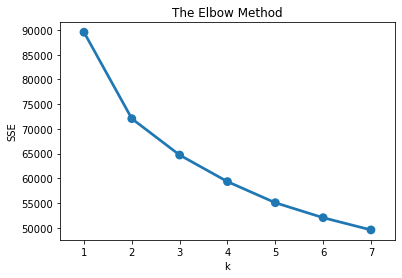

In [89]:
sse = {}
for k in range(1, 8): 
    kmeans = KMeans(n_clusters=k, random_state=654)
    kmeans.fit(boston_normalized)
    sse[k] = kmeans.inertia_
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()));

In [90]:
kmeans = KMeans(n_clusters=2, random_state=654)
kmeans.fit(boston_normalized)
cluster_labels = kmeans.labels_

In [91]:
kmeans2 = boston_normalized.assign(Cluster = cluster_labels)
kmeans2.groupby(['Cluster']).agg({
'total_ppl': 'mean',
'square_foot': 'mean',
'household_income': 'mean',
'number_pets': 'mean',
'entertainment_spend_est': 'mean',
'travel_spend_est': 'mean',
}).round(2)

,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est
Cluster,,,,,,
0,-0.22,0.19,0.60,-0.01,0.57,0.53
1,0.25,-0.21,-0.67,0.01,-0.63,-0.59


In [92]:
kmeans = KMeans(n_clusters=3, random_state=654)
kmeans.fit(boston_normalized)
cluster_labels = kmeans.labels_

In [93]:
kmeans2 = boston_normalized.assign(Cluster = cluster_labels)
kmeans2.groupby(['Cluster']).agg({
'total_ppl': 'mean',
'square_foot': 'mean',
'household_income': 'mean',
'number_pets': 'mean',
'entertainment_spend_est': 'mean',
'travel_spend_est': 'mean',
}).round(2)

,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est
Cluster,,,,,,
0,0.30,-0.25,-0.81,0.02,-0.74,-0.71
1,0.01,1.02,0.30,-0.03,0.25,0.76
2,-0.35,-0.65,0.64,0.01,0.60,0.11


In [94]:
kmeans = KMeans(n_clusters=4, random_state=654)
kmeans.fit(boston_normalized)
cluster_labels = kmeans.labels_

In [95]:
kmeans2 = boston_normalized.assign(Cluster = cluster_labels)
kmeans2.groupby(['Cluster']).agg({
'total_ppl': 'mean',
'square_foot': 'mean',
'household_income': 'mean',
'number_pets': 'mean',
'entertainment_spend_est': 'mean',
'travel_spend_est': 'mean'
}).round(2)

,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est
Cluster,,,,,,
0,0.50,0.07,0.95,0.01,1.06,0.56
1,0.17,1.05,-0.37,0.07,-0.43,0.42
2,-1.13,-0.35,0.38,-0.08,0.23,0.13
3,0.39,-0.61,-0.74,0.00,-0.65,-0.87


In [96]:
kmeans = KMeans(n_clusters=5, random_state=654)
kmeans.fit(boston_normalized)
cluster_labels = kmeans.labels_

In [97]:
kmeans2 = boston_normalized.assign(Cluster = cluster_labels)
kmeans2.groupby(['Cluster']).agg({
'total_ppl': 'mean',
'square_foot': 'mean',
'household_income': 'mean',
'number_pets': 'mean',
'entertainment_spend_est': 'mean',
'travel_spend_est': 'mean',

}).round(2)

,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est
Cluster,,,,,,
0,-1.16,-0.35,0.51,-0.04,0.35,0.18
1,0.31,-0.47,-0.66,-0.93,-0.58,-0.69
2,0.56,0.09,1.02,-0.02,1.15,0.59
3,0.34,-0.42,-0.62,0.95,-0.58,-0.67
4,0.04,1.19,-0.22,0.00,-0.30,0.61


In [98]:
kmeans = KMeans(n_clusters=6, random_state=654)
kmeans.fit(boston_normalized)
cluster_labels = kmeans.labels_

In [99]:
kmeans2 = boston_normalized.assign(Cluster = cluster_labels)
kmeans2.groupby(['Cluster']).agg({
'total_ppl': 'mean',
'square_foot': 'mean',
'household_income': 'mean',
'number_pets': 'mean',
'entertainment_spend_est': 'mean',
'travel_spend_est': 'mean',

}).round(2)

,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est
Cluster,,,,,,
0,0.24,-0.75,-0.91,-0.00,-0.78,-1.19
1,-0.37,1.03,0.83,-0.12,0.82,0.97
2,0.27,0.61,-0.45,1.02,-0.51,0.14
3,-1.11,-0.62,0.43,-0.00,0.30,0.00
4,0.30,0.52,-0.51,-1.00,-0.52,0.12
5,0.87,-0.58,0.74,0.05,0.84,0.15


In [100]:
kmeans = KMeans(n_clusters=7, random_state=654)
kmeans.fit(boston_normalized)
cluster_labels = kmeans.labels_

In [101]:
kmeans2 = boston_normalized.assign(Cluster = cluster_labels)
kmeans2.groupby(['Cluster']).agg({
'total_ppl': 'mean',
'square_foot': 'mean',
'household_income': 'mean',
'number_pets': 'mean',
'entertainment_spend_est': 'mean',
'travel_spend_est': 'mean', 
}).round(2)

,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est
Cluster,,,,,,
0,-0.87,1.12,0.43,0.00,0.28,0.85
1,0.25,-0.59,-0.76,-0.93,-0.65,-0.84
2,0.53,-0.16,0.73,1.01,0.86,0.41
3,0.24,-0.53,-0.78,0.92,-0.71,-0.87
4,-1.13,-0.66,0.35,-0.01,0.20,-0.03
5,0.59,1.04,-0.62,-0.00,-0.64,0.18
6,0.49,-0.07,0.86,-0.97,0.89,0.50


###### we chose to make 4 cluster as it might be effective and we could use our marketing tool effectly on these number clusters 

In [102]:
kmeans = KMeans(n_clusters=4, random_state=654)
kmeans.fit(boston_normalized)
cluster_labels = kmeans.labels_

In [103]:
kmeans2 = boston_normalized.assign(Cluster = cluster_labels)
kmeans2.groupby(['Cluster']).agg({
'total_ppl': 'mean',
'square_foot': 'mean',
'household_income': 'mean',
'number_pets': 'mean',
'entertainment_spend_est': 'mean',
'travel_spend_est': 'mean',
}).round(2)

,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est
Cluster,,,,,,
0,0.50,0.07,0.95,0.01,1.06,0.56
1,0.17,1.05,-0.37,0.07,-0.43,0.42
2,-1.13,-0.35,0.38,-0.08,0.23,0.13
3,0.39,-0.61,-0.74,0.00,-0.65,-0.87


In [104]:
kmeans2['Cluster'] = kmeans2['Cluster'].astype('category')

In [105]:
boston.insert(0, "Cluster", cluster_labels, True)

In [106]:
boston2 = pd.get_dummies(boston, drop_first=False, 
                                columns=['own_rent', 'region','LL_passholder'])

In [107]:
boston2.groupby(['Cluster']).agg({
'own_rent_own': 'mean' ,
'own_rent_rent': "mean",
'region_MetroWest': "mean", 'region_Middlesex': "mean", 'region_North Shore': "mean",
'region_South Shore': "mean", 'region_Suffolk': "mean", 'LL_passholder_No': "mean",
'LL_passholder_Yes': "mean"
}).round(2)

,own_rent_own,own_rent_rent,region_MetroWest,region_Middlesex,region_North Shore,region_South Shore,region_Suffolk,LL_passholder_No,LL_passholder_Yes
Cluster,,,,,,,,,
0,0.76,0.24,0.66,0.11,0.00,0.12,0.12,0.78,0.22
1,0.82,0.18,0.04,0.34,0.24,0.28,0.12,0.80,0.20
2,0.74,0.26,0.15,0.13,0.03,0.15,0.54,0.78,0.22
3,0.70,0.30,0.02,0.23,0.48,0.23,0.04,0.79,0.21


In [108]:
boston2[['own_rent_own', 'Cluster']].groupby('Cluster').agg(pd.Series.mode)

,own_rent_own
Cluster,
0,1
1,1
2,1
3,1


In [109]:
boston2[['own_rent_rent', 'Cluster']].groupby('Cluster').agg(pd.Series.mode)

,own_rent_rent
Cluster,
0,0
1,0
2,0
3,0


In [110]:
boston2[['region_MetroWest', 'Cluster']].groupby('Cluster').agg(pd.Series.mode)

,region_MetroWest
Cluster,
0,1
1,0
2,0
3,0


In [111]:
boston2[['region_Middlesex', 'Cluster']].groupby('Cluster').agg(pd.Series.mode)

,region_Middlesex
Cluster,
0,0
1,0
2,0
3,0


In [112]:
boston2[['region_North Shore', 'Cluster']].groupby('Cluster').agg(pd.Series.mode)

,region_North Shore
Cluster,
0,0
1,0
2,0
3,0


In [113]:
boston2[['region_South Shore', 'Cluster']].groupby('Cluster').agg(pd.Series.mode)

,region_South Shore
Cluster,
0,0
1,0
2,0
3,0


In [114]:
boston2[['region_Suffolk', 'Cluster']].groupby('Cluster').agg(pd.Series.mode)

,region_Suffolk
Cluster,
0,0
1,0
2,1
3,0


In [115]:
boston2[['LL_passholder_No', 'Cluster']].groupby('Cluster').agg(pd.Series.mode)

,LL_passholder_No
Cluster,
0,1
1,1
2,1
3,1


In [116]:
boston2[['LL_passholder_Yes', 'Cluster']].groupby('Cluster').agg(pd.Series.mode)

,LL_passholder_Yes
Cluster,
0,0
1,0
2,0
3,0


cluster 0 = *Big money* = This cluster has not a lot of people living in the house but the income of that house is way too above the mean. these people also like to spend a lot on entertainment, they are an Entrainment Enthusiasts and somewhat like traveling From categorical variable we got to know that they were from region MetroWest. The best way to approach these people would be to make send out ads on OTTs like Hulu, and Netflix or use social media marketing techniques and tell them about the rides that lobster land has and also about the shows lobster lands has as they are more about entertainment. They are attached more towards entertainment hence we can also collaborate with other Board-way shows and either give them a Coupons for those shows or we can get those Broadway shows to perform at lobster land.  

Cluster 1 = *bankrupt mansion* = these people are living in big square feet houses ( mansions) but do not have a lot of household income. They do love having pets in their house and also love to travel but are not very big fans of entertainment. To attract these people I would suggest having ads about the journey to lobster land, we can use social media marketing tools like reels, Carousel, and many more. These people like to spend more on travel hence we can attract them by showing how Beautiful Maine and lobster and using words related to traveling would do the trick.

Cluster 2 = *Dream on* = The people in this cluster have very less people living in their household but with fewer square feet area and near to average income. These people spend about the same amount on both entertainment and travel. They are not very enthusiastic about spending on both categories. They also don't like pets that much, from categorical variable we also got to know that people in this cluster are more from region Suffolk. To reach this audience we would suggest that newspapers, journals, and social media would be ideal. As these people tend to spend on both entertainment and travel but not as much as other groups. Hence, it would be a little hard to get them to come to lobster land perhaps using effective social media marketing tools should do the trick. We can run an Advertisement of testimonials of the people liking the lobster land and asking people to share the picture on social and it might make the people in this group and feeling of excitement and FOMO which might push them off the edge to get to come to lobster land. We could also talk about as suffolk is closer to maine and it would be easier for them to come if they want to get a quick get away from their hectic schedule.     

Cluster 3 = *Down and out* = these people have less than average space and also the household income very low, they are neutral about having pets. As the income is less, they are also not spending that much on Entertainment and travel. To reach this audience I would suggest that we should use coupons and discounts at lobster land. These people tend to spend less and giving them some offers might motivate them to come to lobster land. 

##### Visualisation 

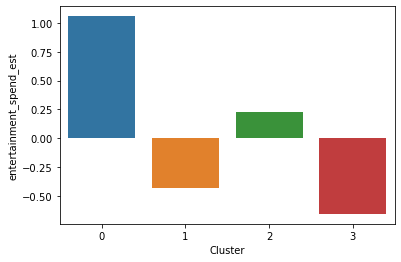

In [117]:
sns.barplot(x='Cluster', y='entertainment_spend_est', data=kmeans2, ci = None);

When we look at the above graph we can see that cluster 3 is totay not about entertainment speniding they don't like to spend money on Entertainment. The cluster 1 also doesn't like spending too much on entertainment. But cluster 0 they are all about it. They love Being entertained and will Spend a lot of money on it. The cluster 1 also doesn't like spending too much on entertainment. cluster 2 is on the fence about spending money on entertainment tey do like to spend money on entertainment but they are very Particularly about it. 

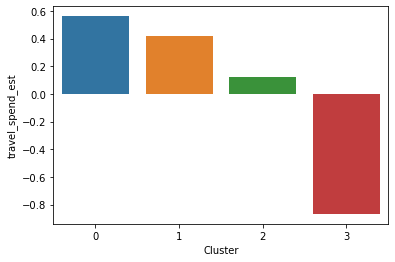

In [118]:
sns.barplot(x='Cluster', y='travel_spend_est', data=kmeans2, ci = None);

When we look at this graph we see that cluster 3 does not like travelling at all. They are the only one that doesn't like to spend on travel. Cluster 0 and 1 absolutely love to spend on travelling these might be the people who loves to travel a lot and go to different places. Cluster 2 is again on the fence about spending too much on travelling that means they do love to travel but they are very particular when they are planning where to travel. The interesting part about this graph and the previous graph is that the cluster number 2 has totally different opinion about travelling and spending on entertainment. 

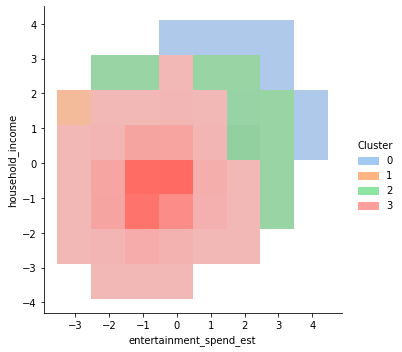

In [119]:
sns.displot(x = "entertainment_spend_est", y = 'household_income', hue = "Cluster", 
            palette = 'pastel',
            data = kmeans2, discrete = True)

This graph shows the relation between household income and how much people on the cluster spend on entertainment. By looking add this graph, we can say that in cluster number 3 is highly distributed on the graph and it is more in the lower end of the graph of both the variables, this tells us that people in cluster 3 does not have very high income and also does not like to spend much on their entertainment. Next cluster that is also distributed along the graph is this cluster number 2. People in cluster 2 do like to spend a lot on their entertainment but we can see from the graph that there are some people who even though have a higher income does not like to spend that much on their entertainment. Many people in this cluster also has less than mean household income but even after that they like to spend a lot on their entertainment. The cluster 0 has the highest household income and is distributed on the right side of the entertainment spending, people in this cluster does like to have entertainment in their lives. Cluster 1 is Not distributed / shown that much in this graph but we can see that people in the cluster two even though after having more than mean income they do not like to spend on entertainment.  

In [120]:
extra = kmeans2.groupby('Cluster')[['square_foot', 'travel_spend_est']].mean()

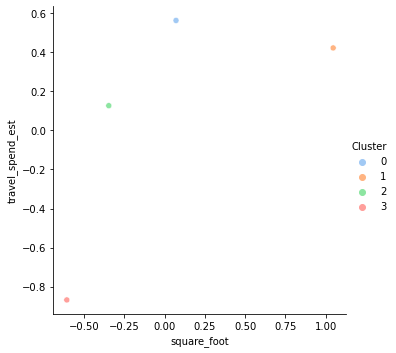

In [121]:
sns.relplot(x='square_foot', y='travel_spend_est', hue='Cluster',palette = 'pastel', data=extra)

This is a scatterplot which shows us the relation of square footage and travels spending. By looking at this graph we can conclude that people who are in cluster 1 does not have a lot of square foot area and also does not like spending too much on travel. But the people in other cluster loves to spend on travel. People in cluster number 2 spends around average on travelling and has less than average square feet of area for them. And people in cluster number 0 they have about the average square feet area for them to live in but they love to travel a lot and spend a lot on travelling. Tell us that we were seeing a linear relationship being built in between square feet and travels pending but cluster number 1 shows us that there might be non linear relationship between square feet and travelling as people in cluster number to have a lot of square foot area to themselves but they tend to spend less on travel than cluster number 0.  

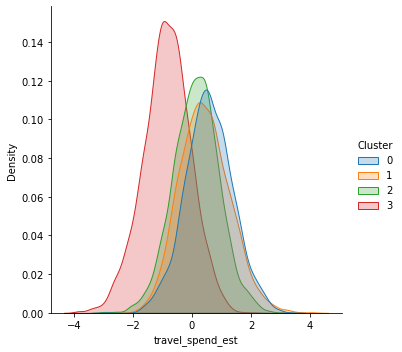

In [122]:
sns.displot(kmeans2, x="travel_spend_est", hue="Cluster", kind='kde', fill= True)

From the above graph we can see that most of the clusters pile up to be together and has a peak almost around the average or above average for travel spending. The only cluster that has a higher peak less than average is cluster number 4 which tells us that people in cluster number four does not like to spend on travelling. Some of the people are slightly Above average and on average and like to spend on the travelling as you can see that the crew tosses of the cluster 4 is big. The highest peak among other cluster is with cluster number 3 along side 1 that is slightly more than average spending on travelling but not very high. 

In [123]:
travel = kmeans2[(kmeans2.Cluster == 0) | (kmeans2.Cluster == 1)]

In [124]:
travel['Cluster'].value_counts()

1    3522
0    3404
2       0
3       0
Name: Cluster, dtype: int64

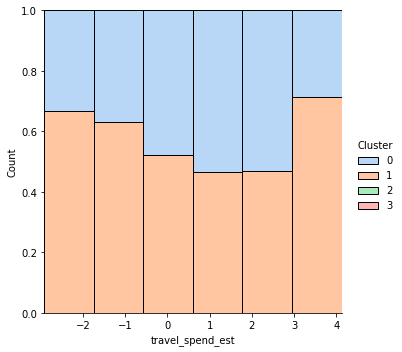

In [125]:
sns.displot(x = "travel_spend_est", hue = "Cluster",bins = 6, 
            palette = 'pastel', multiple = "fill", data =  travel)

From this plot we can see that there is a higher variants within the travel spending in cluster number 1 and cluster number 0 is more dense towords middle of the graph. Close to 0 is more dense on the edges of the travel spending and has less denscity in the middle. This means people in cluster one should be carefully approached while talking about spending on travel.  